# Question 8 part 2
## Using Clustering Techniques to label based on spending habits

Some exploritory analysis was done on this new dataset and picked the top five countries that have spent the most in scotland from `2013-2019` see [here..](../data/extra_cleaning.ipynb) for more details into the exact methods these countries we're selected.

Top Five:
- `USA` `Germany` `Australia` `France` `Canada`

## Load Cleaned Data & Libraries

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

#set plot sizes
sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

# Cleaned Data
usa = pd.read_csv('../data/clean_data/countries/usa.csv')
germany = pd.read_csv('../data/clean_data/countries/germany.csv')
australia = pd.read_csv('../data/clean_data/countries/australia.csv')
france = pd.read_csv('../data/clean_data/countries/france.csv')
canada = pd.read_csv('../data/clean_data/countries/canada.csv')

In [2]:
## Functions

In [3]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [4]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xticks(range(1, 12))
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

### K-Means Clustering for Counties that have spent the most while visiting scotland

### Clustering ~ USA data

In [5]:
usa

,year,country,purpose,mode,duration,age,visits_thousand,nights_thousand,millions_spent
0,2002,USA,Holiday,Air,4-7 nights,0-15,0.270000,1.600000,0.160000
1,2002,USA,Holiday,Air,4-7 nights,16-24,1.080000,4.620000,0.250000
2,2002,USA,Holiday,Air,4-7 nights,25-34,0.990000,5.030000,0.810000
3,2002,USA,Holiday,Air,4-7 nights,45-54,0.350000,1.800000,0.080000
4,2002,USA,Holiday,Air,4-7 nights,65+,1.660000,10.090000,0.620000
...,...,...,...,...,...,...,...,...,...
3604,2019,USA,VFR,Air,15+ nights,25-34,4.051227,33.920169,0.630585
3605,2019,USA,VFR,Air,15+ nights,35-44,0.636022,1.996985,0.079477
3606,2019,USA,VFR,Air,15+ nights,55-64,0.413906,2.599171,0.651369
3607,2019,USA,VFR,Air,15+ nights,65+,0.413906,2.165976,0.037496


In [6]:
usa.corr()

,year,visits_thousand,nights_thousand,millions_spent
year,1.000000,0.174123,0.105537,0.194724
visits_thousand,0.174123,1.000000,0.666883,0.837578
nights_thousand,0.105537,0.666883,1.000000,0.690803
millions_spent,0.194724,0.837578,0.690803,1.000000


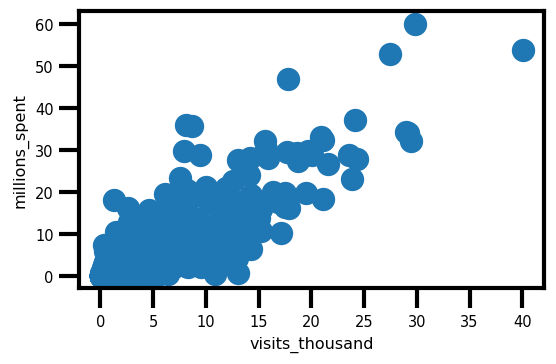

In [7]:
plt.scatter(x = usa['visits_thousand'], y= usa['millions_spent'])
plt.xlabel("visits_thousand")
plt.ylabel("millions_spent");

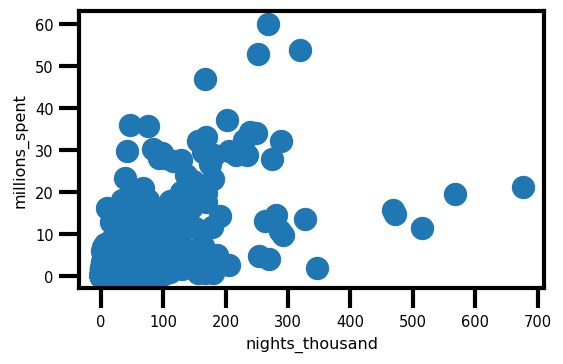

In [8]:
plt.scatter(x = usa['nights_thousand'], y= usa['millions_spent'])
plt.xlabel("nights_thousand")
plt.ylabel("millions_spent");

In [9]:
relevant_cols = ["visits_thousand", "nights_thousand", "millions_spent"]
#relevant_cols = ["nights_thousand", "millions_spent"]

usa_rel = usa[relevant_cols].copy()
usa_rel

,visits_thousand,nights_thousand,millions_spent
0,0.270000,1.600000,0.160000
1,1.080000,4.620000,0.250000
2,0.990000,5.030000,0.810000
3,0.350000,1.800000,0.080000
4,1.660000,10.090000,0.620000
...,...,...,...
3604,4.051227,33.920169,0.630585
3605,0.636022,1.996985,0.079477
3606,0.413906,2.599171,0.651369
3607,0.413906,2.165976,0.037496


In [10]:
scaler = StandardScaler()
scaler.fit(usa_rel)
scaled_data = scaler.transform(usa_rel)

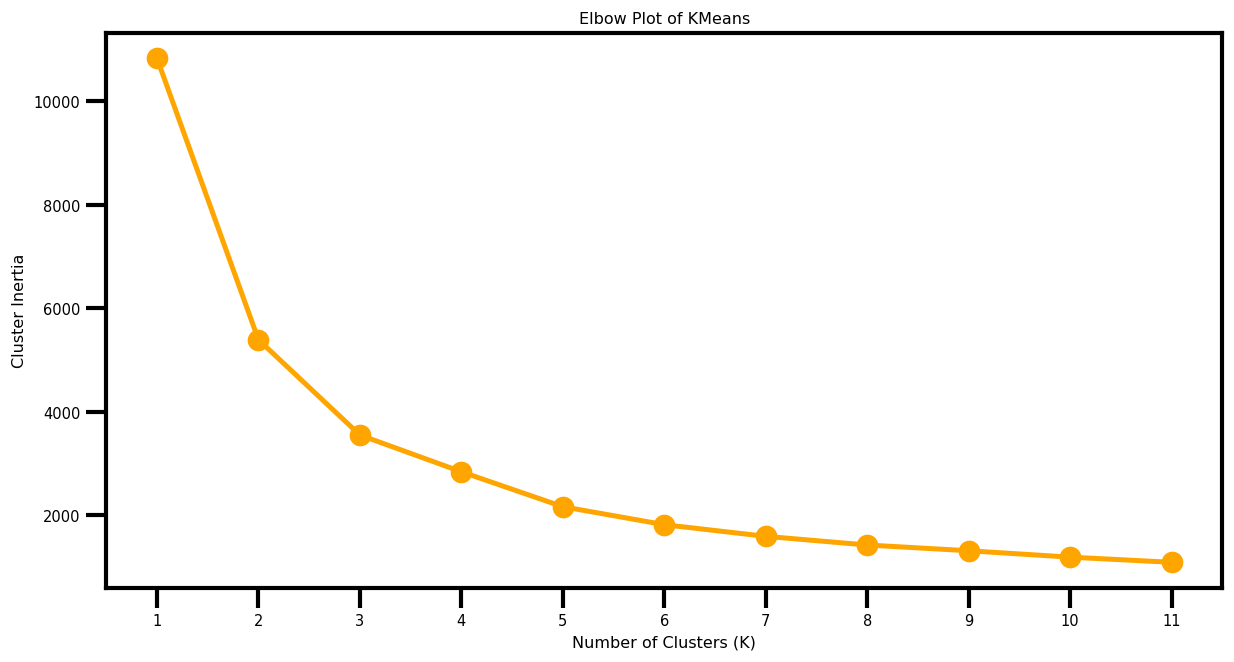

In [11]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [12]:
# get elbow!!
kneed1 = KneeLocator(range(1,12),clusters_centers, curve="convex", direction="decreasing")
kneed1.elbow

3

In [13]:
kmeans_model = KMeans(n_clusters = 3, n_init=10, max_iter=300, init='random')
kmeans_model.fit(scaled_data)

KMeans(init='random', n_clusters=3)

In [14]:
usa_rel["clusters"] = kmeans_model.labels_

usa_rel

,visits_thousand,nights_thousand,millions_spent,clusters
0,0.270000,1.600000,0.160000,0
1,1.080000,4.620000,0.250000,0
2,0.990000,5.030000,0.810000,0
3,0.350000,1.800000,0.080000,0
4,1.660000,10.090000,0.620000,0
...,...,...,...,...
3604,4.051227,33.920169,0.630585,0
3605,0.636022,1.996985,0.079477,0
3606,0.413906,2.599171,0.651369,0
3607,0.413906,2.165976,0.037496,0


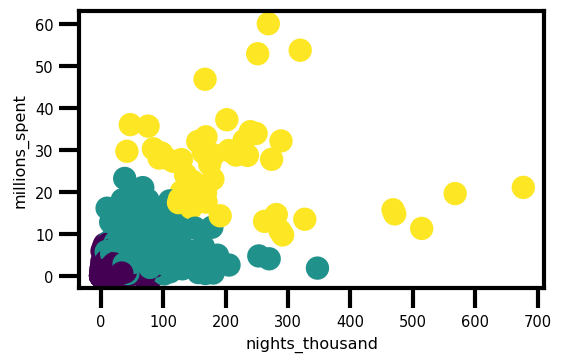

In [15]:
plt.scatter(x = usa_rel['nights_thousand'], y= usa_rel['millions_spent'], c=usa_rel["clusters"])
plt.xlabel("nights_thousand")
plt.ylabel("millions_spent");

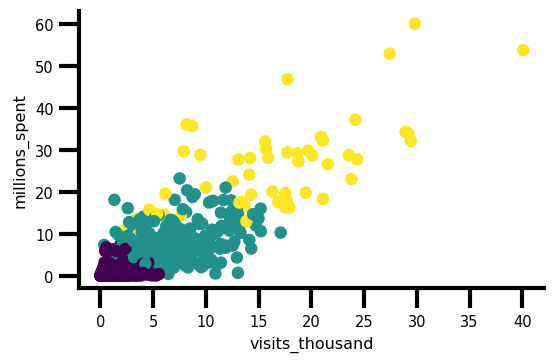

In [16]:
plt.scatter(x = usa_rel['visits_thousand'], y= usa_rel['millions_spent'], c=usa_rel["clusters"], s=30)
sns.despine()
plt.xlabel("visits_thousand")
plt.ylabel("millions_spent");

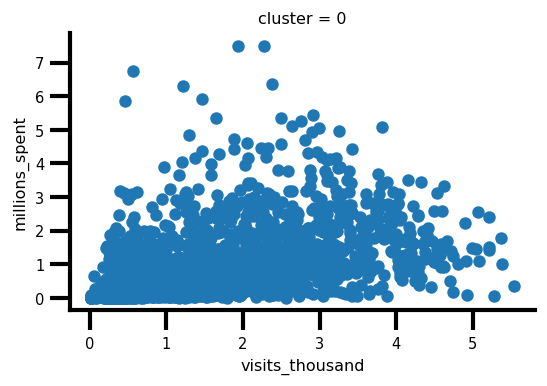

In [17]:
plt.scatter(data = usa_rel.query("clusters == 0"), x = 'visits_thousand', y= 'millions_spent', s=30)
sns.despine()
plt.xlabel("visits_thousand")
plt.ylabel("millions_spent")
plt.title('cluster = 0');

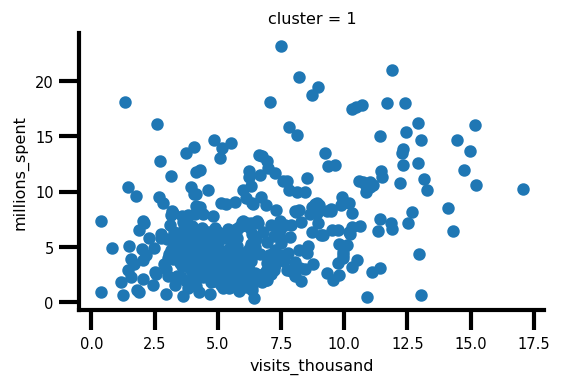

In [18]:
plt.scatter(data = usa_rel.query("clusters == 1"), x = 'visits_thousand', y= 'millions_spent', s=30)
sns.despine()
plt.xlabel("visits_thousand")
plt.ylabel("millions_spent")
plt.title('cluster = 1');

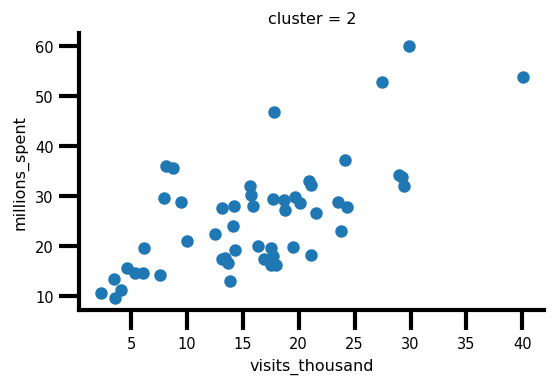

In [19]:
plt.scatter(data = usa_rel.query("clusters == 2"), x = 'visits_thousand', y= 'millions_spent', s=30)
sns.despine()
plt.xlabel("visits_thousand")
plt.ylabel("millions_spent")
plt.title('cluster = 2');

#### Rename clusters usa

In [20]:
# 0 - big_spenders
# 1 - medium_spenders
# 2 - small_spenders

cluster_types = {0 : 'small_spenders', 
             1 : 'medium_spenders', 
             2 : 'big_spenders'}

usa_rel['clusters'] = usa_rel['clusters'].map(cluster_types)
usa_rel

,visits_thousand,nights_thousand,millions_spent,clusters
0,0.270000,1.600000,0.160000,small_spenders
1,1.080000,4.620000,0.250000,small_spenders
2,0.990000,5.030000,0.810000,small_spenders
3,0.350000,1.800000,0.080000,small_spenders
4,1.660000,10.090000,0.620000,small_spenders
...,...,...,...,...
3604,4.051227,33.920169,0.630585,small_spenders
3605,0.636022,1.996985,0.079477,small_spenders
3606,0.413906,2.599171,0.651369,small_spenders
3607,0.413906,2.165976,0.037496,small_spenders


### Clustering ~ Germany data

In [21]:
germany.corr()

,year,visits_thousand,nights_thousand,millions_spent
year,1.000000,0.077658,0.002803,0.080596
visits_thousand,0.077658,1.000000,0.458410,0.535649
nights_thousand,0.002803,0.458410,1.000000,0.578870
millions_spent,0.080596,0.535649,0.578870,1.000000


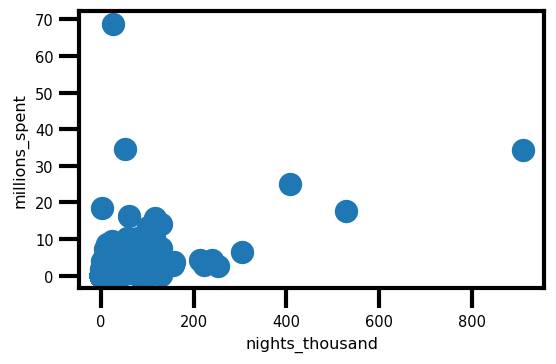

In [22]:
plt.scatter(data=germany, x = 'nights_thousand', y = 'millions_spent')
plt.xlabel("nights_thousand")
plt.ylabel("millions_spent");

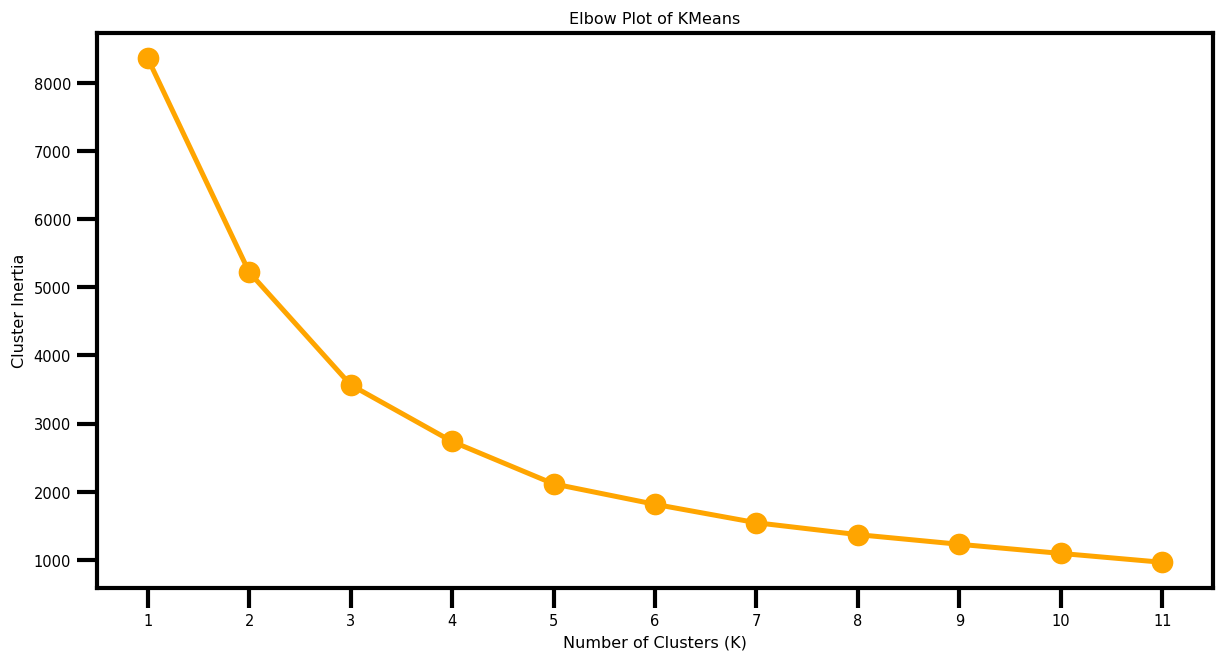

In [23]:
#relevent columns see usa example....
ger_rel = germany[relevant_cols].copy()

#scale values
scaler = StandardScaler()
scaler.fit(ger_rel)
scaled_data = scaler.transform(ger_rel)

clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

In [24]:
#find elbow
k_ger = KneeLocator(range(1,12),clusters_centers, curve="convex", direction="decreasing")
k_ger.elbow

4

In [25]:
kmeans_model = KMeans(n_clusters = k_ger.elbow, n_init=10, max_iter=300, init='random')
kmeans_model.fit(scaled_data)

KMeans(init='random', n_clusters=4)

In [26]:
ger_rel["clusters"] = kmeans_model.labels_

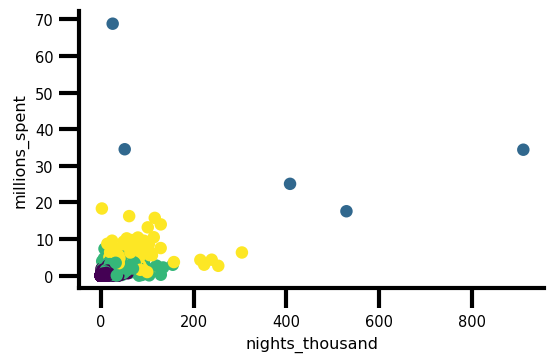

In [27]:
plt.scatter(data = ger_rel, x='nights_thousand', y='millions_spent', c='clusters', s=30)
sns.despine()
plt.xlabel("nights_thousand")
plt.ylabel("millions_spent");

### Clustering ~ Australia data

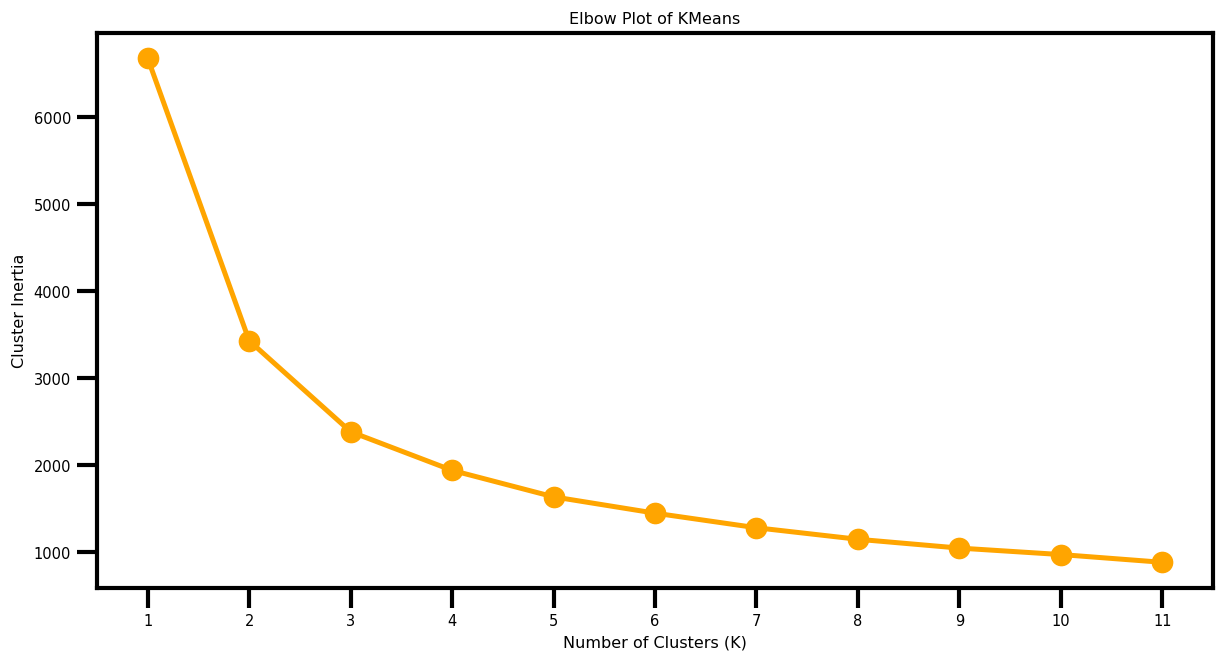

In [28]:
#relevent columns see usa example....
aus_rel = australia[relevant_cols].copy()

#scale values
scaler = StandardScaler()
scaler.fit(aus_rel)
scaled_data = scaler.transform(aus_rel)

clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

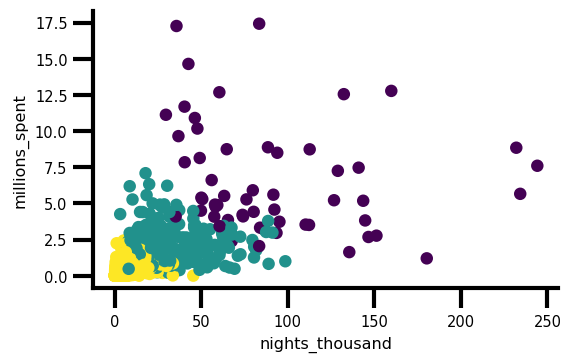

In [29]:
#find elbow
k_aus = KneeLocator(range(1,12),clusters_centers, curve="convex", direction="decreasing")

#make model
kmeans_model = KMeans(n_clusters = k_aus.elbow, n_init=10, max_iter=300, init='random')
kmeans_model.fit(scaled_data)

#add cluster tags
aus_rel["clusters"] = kmeans_model.labels_

#plot australia's clusters
plt.scatter(data = aus_rel, x='nights_thousand', y='millions_spent', c='clusters', s=30)
sns.despine()
plt.xlabel("nights_thousand")
plt.ylabel("millions_spent");

In [30]:
k_aus.elbow

3

### Clustering ~ France data

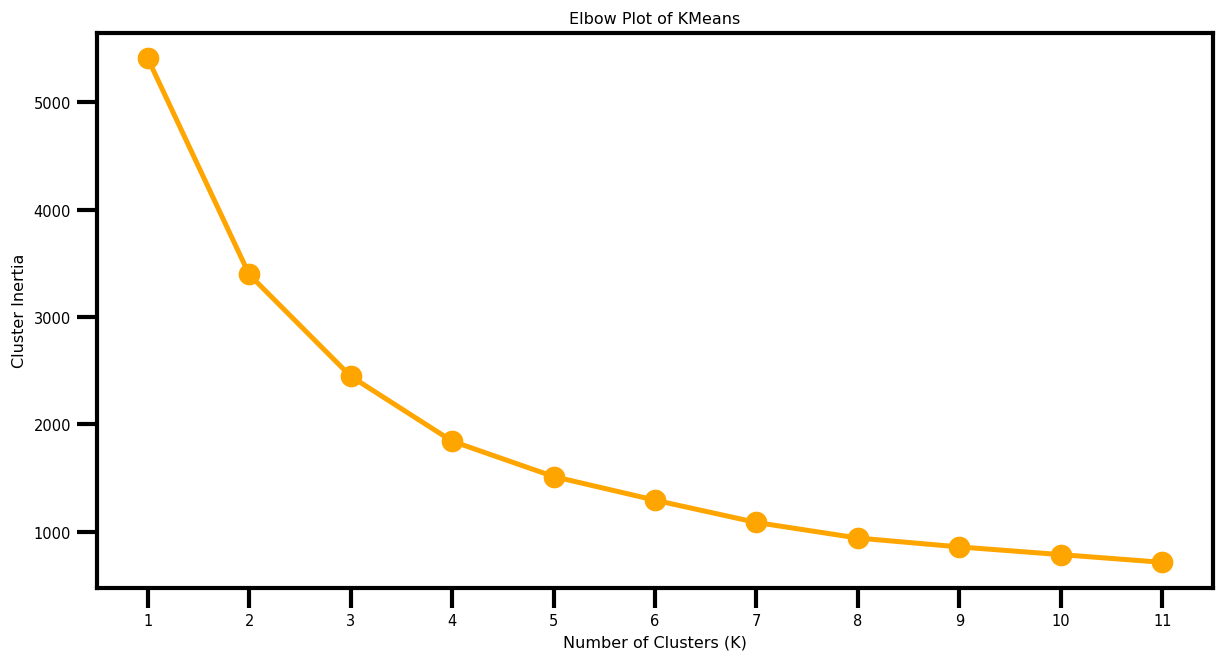

In [31]:
#relevent columns see usa example....
fra_rel = france[relevant_cols].copy()

#scale values
scaler = StandardScaler()
scaler.fit(fra_rel)
scaled_data = scaler.transform(fra_rel)

clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

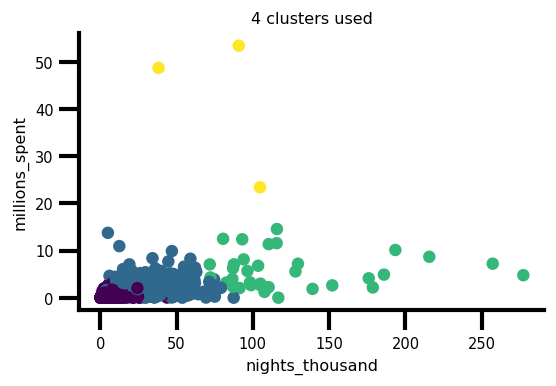

In [32]:
#find elbow
k_fra = KneeLocator(range(1,12),clusters_centers, curve="convex", direction="decreasing")

#make model
kmeans_model = KMeans(n_clusters = k_fra.elbow, n_init=10, max_iter=300, init='random')
kmeans_model.fit(scaled_data)

#add cluster tags
fra_rel["clusters"] = kmeans_model.labels_

#plot australia's clusters
plt.scatter(data = fra_rel, x='nights_thousand', y='millions_spent', c='clusters', s=30)
sns.despine()
plt.xlabel("nights_thousand")
plt.ylabel("millions_spent")
plt.title(f"{k_fra.elbow} clusters used");

### Clustering ~ Canada data

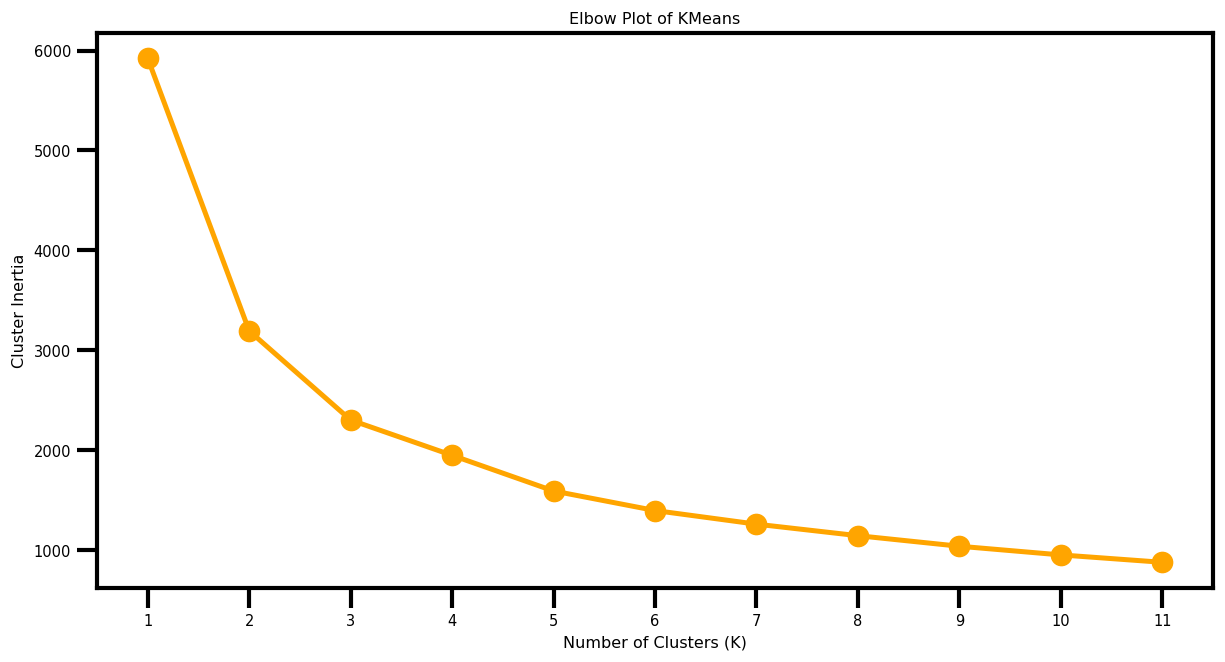

In [33]:
#relevent columns see usa example....
can_rel = canada[relevant_cols].copy()

#scale values
scaler = StandardScaler()
scaler.fit(can_rel)
scaled_data = scaler.transform(can_rel)

clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

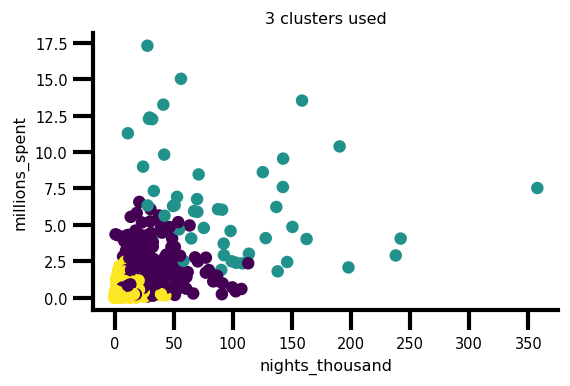

In [34]:
#find elbow
k_can = KneeLocator(range(1,12),clusters_centers, curve="convex", direction="decreasing")

#make model
kmeans_model = KMeans(n_clusters = k_can.elbow, n_init=10, max_iter=300, init='random')
kmeans_model.fit(scaled_data)

#add cluster tags
can_rel["clusters"] = kmeans_model.labels_

#plot australia's clusters
plt.scatter(data = can_rel, x='nights_thousand', y='millions_spent', c='clusters', s=30)
sns.despine()
plt.xlabel("nights_thousand")
plt.ylabel("millions_spent")
plt.title(f"{k_can.elbow} clusters used");